In [1]:
# Arnold 猫变换

import cv2
import numpy as np

import matplotlib.pyplot as plt


In [2]:
def matrix_power_mod(matrix: np.ndarray, power: int, mod: np.ndarray):
	result = np.eye(matrix.shape[0], dtype=np.int64)
	for _ in range(power):
		result = np.matmul(result, matrix) % mod
	return result

def arnold(img, N):
	img = np.array(img)
	h, w, c = img.shape
	new_img = np.zeros((h, w, c), dtype=np.uint8)
	matrix = np.array([[2, 1], [1, 1]])
	N_matrix = matrix_power_mod(matrix, N, np.array([h, w]))
	print(N_matrix)
	N_matrix = N_matrix % np.array([h, w])
	for x in range(h):
		for y in range(w):
			new_x, new_y = np.dot(N_matrix, np.array([x, y])) % np.array([h, w])
			new_img[new_x, new_y] = img[x, y]
	return new_img


[[473 439]
 [439  34]]


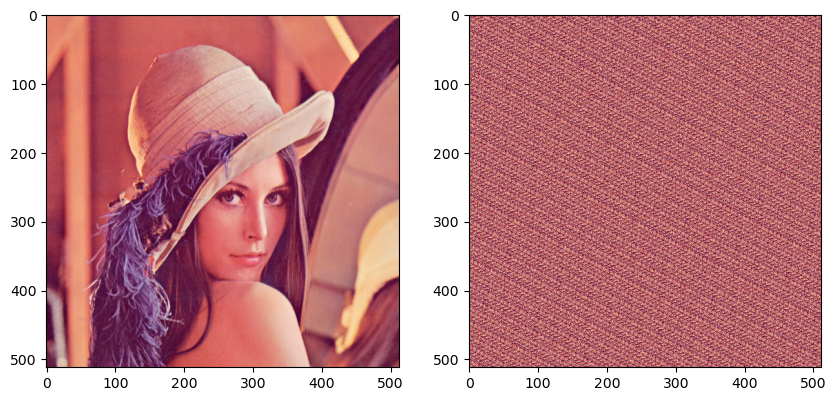

In [3]:
img_bgr = cv2.imread('LenaRGB.bmp', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

new_img = arnold(img_rgb, 101) # 101 是一个质数，具有更好的打散效果

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.imshow(new_img)
plt.show()
